# Wrangle & Analyze Data on WeRateDogs tweets!

### Project from the Udacity Data Analyst nanodegree


Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document my wrangling efforts and showcase them through analyses and visualizations using Python.

The dataset that I will be wrangling is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent"](https://knowyourmeme.com/memes/theyre-good-dogs-brent). WeRateDogs has over 8 million followers and has received international media coverage.

WeRateDogs [downloaded their Twitter archive](https://help.twitter.com/en/managing-your-account/how-to-download-your-twitter-archive) and sent it to Udacity via email exclusively for us to use in this project.

## Project motivation

### Context
My goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information therefore additional gathering, then assessing and cleaning is required.

## The Data

### Enhanced Twitter Archive
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which Udacity used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, Udacity has filtered for tweets with ratings only (there are 2356). Udacity extracted this data programmatically, but didn't do a very good job. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages too. I'll need to assess and clean these columns, then use them for analysis and visualization.

## Key Points
- We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- We do not need to gather the tweets beyond August 1st, 2017.


## Table of contents
- <a href='#twitter_archive'>Quick look at the Twitter archive</a>
- <a href='#data_gathering'>Data Gathering</a>
    - <a href='#dog_breed_classification'>Deep Learning for dog breed classification</a>
    - <a href='#twitter_api'>Gather additional data with the Twitter API</a>
- <a href='#data_assessment'>Data Assessment</a>
- <a href='#data_cleaning'>Data Cleaning</a>
- <a href='#analysis_and_visualizations'>Analysis & Visualizations</a>

<a id='twitter_archive'></a>
## Quick look at the Twitter archive

As a first step we will start by looking at the given Twitter archive to have get feeling on how the data looks like and see where can be improved. The archive can be downloaded at the following [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv).

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# display better plots
sns.set_style("darkgrid")

# increase font size
plt.rcParams.update({'font.size': 18})

In [2]:
# load data and show its content
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

From the information above we can see that from this data we basically get only the tweet ID and the text, from which other information are derived like name and stages. A clear missing information is the dog's breed! Before meking any cleaning and analysis let's gather more information.

**Note:** if you are not familiar with what is a doggo, floofer, pupper and puppo I suggest you to watch the funny video shown below :).

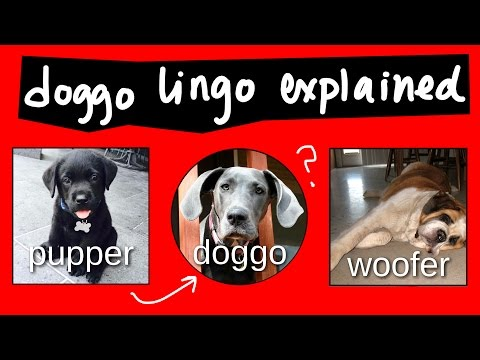

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('ah6fmNEtXFI', width=800, height=600)

<a id='data_gathering'></a>
## Data Gathering

Gathering data varies from project to project. Sometimes we're just given data, or pointed to it like the case of this Twitter archive. Sometimes we need to search for the right data for our project. Sometimes the data we need isn't readily available, and we need to generate it ourself somehow. When we do find your data, it's not unusual for it to be spread across several different sources and file formats, which makes things tricky when organizing the data in our programming environment. For these reasons and more, gathering can be tricky.

In this project I will gather more data from the web as well as from the Twitter API itself, let's start.

<a id='dog_breed_classification'></a>
### Deep Learning for dog breed classification

As already mentioned before, in the Twitter archive we are missing the dog's breed and if we want to conduct an analysis on the highest rated dog's breed well... we need this information. This is not something that we can easily read in a tweet since it can be derived from the image of the dog itself, for this reason we can use machine learning to help us!

In this case Udacity has already provided a file for us but if you want to learn how to create a dog breed classifier using deep learning you can check my [GitHub repo](https://github.com/DavidMachineLearning/DogBreedDetection) and my [Blog Post](https://davidforino-aisolutions.com/dog-breed-detection/).

Udacity has created for us an image predictions file containing a table full of image predictions alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction. Let's download it directly from python!

In [5]:
# import the necessary library
import requests

# download the file and save it in the same directory
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
with open("image-predictions.tsv", 'wb') as f:
    f.write(r.content)

# load the file and display its content
df_predictions = pd.read_csv("image-predictions.tsv", sep="\t")  # is a tsv file so tab separated
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Great, below is a description of each column:
- tweet_id is the last part of the tweet URL after "status/"
- jpg_url is the url where the picture corresponding to the most confident prediction is located
- img_num is the image number (can be up to 4) corresponding to the most confident prediction
- p1 is the algorithm's #1 prediction for the image in the tweet
- p1_conf is how confident the algorithm is in its #1 prediction
- p1_dog is whether or not the #1 prediction is a breed of dog
- p2 is the algorithm's second most likely prediction
- p2_conf is how confident the algorithm is in its #2 prediction
- p2_dog is whether or not the #2 prediction is a breed of dog
- p3 is the algorithm's third most likely prediction
- p3_conf is how confident the algorithm is in its #3 prediction
- p3_dog is whether or not the #3 prediction is a breed of dog

If we want to visualize the picture of a dog, we can do it directly from the notebook.

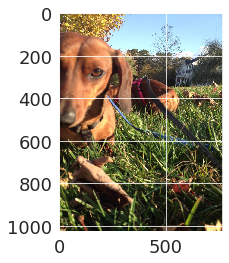

In [6]:
# import the necessary libraries
from PIL import Image
from io import BytesIO

# download the image and display it
r = requests.get(df_predictions.jpg_url[1])
image = Image.open(BytesIO(r.content))
plt.imshow(image);

<a id='twitter_api'></a>
### Gather additional data with the Twitter API

Using the tweet IDs in the WeRateDogs Twitter archive we can gather additional information, like retweet count and number of likes, by querying the Twitter API for each tweet's JSON data using Python's Tweepy library. We can then store each tweet's entire set of JSON data in a txt file and then read it into a pandas DataFrame.

If you want to use the Twitter API you should first [sign up](https://help.twitter.com/en/using-twitter/create-twitter-account) for a Twitter account, if you do not already have one.
Next, set up a developer account, follow the directions on [Twitter’s Developer Portal](https://developer.twitter.com/en/docs/developer-portal/overview), in the “How to Apply” section. After the registration you will get the following keys:
- API key
- API key secret
- Access token
- Access token secret

With these keys you will be able to execute the code below.

In [7]:
# import necessary libraries
import json
from tqdm import tqdm
from time import time, sleep
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [ ]:
# replace these keys with your own
API_KEY = 'HIDDEN'
API_KEY_SECRET = 'HIDDEN'
ACCESS_TOKEN = 'HIDDEN'
ACCESS_TOKEN_SECRET = 'HIDDEN'

# autenticate and get the api
auth = OAuthHandler(API_KEY, API_KEY_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
fails = {}

# file containing tweet's JSON data
with open('json_tweets.txt', 'w') as f:
    
    # gather JSON data for each tweet ID
    for tweet_id in tqdm(df_archive.tweet_id.values):
        
        # get the tweet and save it into the file
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')

        # keep track of errors and save tweet IDs which failed
        except tweepy.TweepError as e:
            fails[tweet_id] = e

print("These tweets couldn't be gathered:")
for key, value in fails.items():
    print(key, value)

We can see that some tweets failed, mostly because the have been removed. We have a lot more data compared to before anyway so let's take a look at it.

In [8]:
with open('json_tweets.txt') as json_file:
    json_data = []
    for line in json_file.readlines():
        # read 1 tweet
        dictionary = json.loads(line)
        # check if it is a retweet
        is_a_retweet = dictionary.get('retweeted_status', False)
        dictionary["is_a_retweet"] = is_a_retweet if isinstance(is_a_retweet, bool) else True
        json_data.append(dictionary)
df_api = pd.DataFrame(json_data)
pd.set_option('max_columns', None)
df_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,is_a_retweet,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,7428,35206,False,False,False,False,en,False,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,5524,30476,False,False,False,False,en,False,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,3647,22920,False,False,False,False,en,False,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,7605,38496,False,False,False,False,en,False,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8188,36762,False,False,False,False,en,False,NaN,NaN,NaN,NaN,NaN


In [9]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2330 non-null   object 
 1   id                             2330 non-null   int64  
 2   id_str                         2330 non-null   object 
 3   full_text                      2330 non-null   object 
 4   truncated                      2330 non-null   bool   
 5   display_text_range             2330 non-null   object 
 6   entities                       2330 non-null   object 
 7   extended_entities              2058 non-null   object 
 8   source                         2330 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

We have many columns but it is mostly missing data, we can surely use the number of likes (favorite_count), number of retweets and is_a_retweet, which is what we wanted, but let's see if we can use some other columns.

In [10]:
df_api.lang.value_counts()

en     2312
und       7
nl        3
in        3
ro        1
es        1
eu        1
tl        1
et        1
Name: lang, dtype: int64

Mostly are english tweets it seems, but we can still keep this column for further analysis later on.

In [11]:
df_api.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

From the source we can see the phone brand, but since these tweets are coming from 1 user only is not of much help. We have this column in the archive dataset anyway.

In [12]:
df_api.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

Last column to keep is the entities since we can retrieve hashtags from it, all other columns can be discarded.

In [13]:
df_api = df_api[["id", "entities", "retweet_count", "favorite_count", "lang", "is_a_retweet"]]
df_api.to_csv("json_tweets_reduced.csv", sep=";")

<a id='data_assessment'></a>
## Data Assessment

Assessing data is the second step in data wrangling. When assessing, we are looking for 2 main things in the  dataset: data quality issues (i.e. content issues) and lack of [tidiness](https://vita.had.co.nz/papers/tidy-data.html) (i.e. structural issues). Let's start by looking at each dataframe.

In [14]:
df_api.head()

,id,entities,retweet_count,favorite_count,lang,is_a_retweet
0,892420643555336193,"{'hashtags': [], 'symbols': [], 'user_mentions...",7428,35206,en,False
1,892177421306343426,"{'hashtags': [], 'symbols': [], 'user_mentions...",5524,30476,en,False
2,891815181378084864,"{'hashtags': [], 'symbols': [], 'user_mentions...",3647,22920,en,False
3,891689557279858688,"{'hashtags': [], 'symbols': [], 'user_mentions...",7605,38496,en,False
4,891327558926688256,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",8188,36762,en,False


In [15]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2330 non-null   int64 
 1   entities        2330 non-null   object
 2   retweet_count   2330 non-null   int64 
 3   favorite_count  2330 non-null   int64 
 4   lang            2330 non-null   object
 5   is_a_retweet    2330 non-null   bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 93.4+ KB


In [16]:
df_api.is_a_retweet.value_counts()

False    2167
True      163
Name: is_a_retweet, dtype: int64

In [17]:
df_api.lang.value_counts()

en     2312
und       7
nl        3
in        3
ro        1
es        1
eu        1
tl        1
et        1
Name: lang, dtype: int64

In [18]:
ids_not_english = df_api.query("lang != 'en'").id.values

In [19]:
for id_ in ids_not_english:
    text = df_archive.query(f"tweet_id == {id_}").text
    print(text, end="\n\n\n")

32    RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
Name: text, dtype: object


165    RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...
Name: text, dtype: object


290    @markhoppus 182/10
Name: text, dtype: object


409    @HistoryInPics 13/10
Name: text, dtype: object


620    #ImWithThor 13/10\nhttps://t.co/a18mzkhTf6
Name: text, dtype: object


870    Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...
Name: text, dtype: object


982    Duuun dun... duuun dun... dunn  dun. dunn dun....
Name: text, dtype: object


1080    @mount_alex3 13/10
Name: text, dtype: object


1345    13/10 hero af\n@ABC
Name: text, dtype: object


1523    12/10 @LightningHoltt
Name: text, dtype: object


1659    aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...
Name: text, dtype: object


1666    NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...
Name: text, dtype: object


1886    ER... MER... GERD 13/10 https://t.co/L1puJISV1a
Name: text, dtype: object


1914    13/10\n@ABC7
Name: text, dtype: object



In [20]:
(df_api.retweet_count < 0).sum(), (df_api.favorite_count < 0).sum()

(0, 0)

Ok great, from the code cells above we can point out the following issues:

**Quality**
- non english language correspond to links and funny text, so the column is not useful
- there are 163 retweets
- hashtags have to be extracted from entities
- id should be named tweet_id like the other dataframes and should be of type string since we don't perform operations on it

In [21]:
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_predictions.jpg_url.duplicated().sum()

66

In [24]:
len(df_predictions.query("p1_dog == False and p2_dog == False and p3_dog == False"))

324

Regarding the data frame containing pictures we have the following issues:

**Quality**
- there are 66 duplicated images
- tweet_id should be of type string since we don't want to performs operations on it

**Tidiness**
- we can compress the columns "img_num", "p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog" into 2 useful columns: "breed" and "prediction_confidence"
- the 324 rows containing no dog's breed prediction should have nan value under the column "breed" and "prediction_confidence"

In [25]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [26]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
# just as a safety measure we assume ratings below 10 (bad) to be an error
# when extracting information from the text
df_archive.query("rating_numerator < 10").text[45]

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [28]:
df_archive.query("rating_denominator != 10").text[313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [29]:
df_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Jeb          1
Jordy        1
Dewey        1
Aja          1
Kanu         1
Name: name, Length: 957, dtype: int64

In [30]:
df_archive.query("name == 'None'").text[25]

'This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp'

In [31]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [32]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [33]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [34]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In this last dataset ther are the following issues:

**Quality**
- wrong ratings in the denominator caused by bad text extraction
- wrong ratings in the numerator caused by bad text extraction
- wrong dog names such as "a"
- missing values in the column name have "None" instead of nan
- missing values in the columns doggo, floofer, pupper, puppo have "None" instead of nan
- tweet_id should be of type string since we don't want to performs operations on it
- timestamp is of type string
- ratings do not have all the time the same denominator
- expanded_urls is a redundant information (https:// twitter .com/dog_rates/status/ + tweet_id)

**Tidiness**
- the columns doggo, floofer, pupper, puppo should be combined into 1 colled stage


**After cleaning all datasets, we should merge them into 1 table in order to have a tidy dataset.**

<a id='data_cleaning'></a>
## Data Cleaning

Now that we have identified all the cleaning and tidyness that needs to be done, we can focus on actually doing it in pandas! 

**Define**
- extract hashtags from the df_api dataframe.

In [35]:
# keep a copy of each original dataframe
df_api_original = df_api.copy()
df_predictions_original = df_predictions.copy()
df_archive_original = df_archive.copy()

**Code**

In [36]:
df_api["hashtags"] = df_api.entities.map(lambda x: "-".join([hashtag["text"] for hashtag in x["hashtags"]]) if len(x["hashtags"]) > 0 else np.nan)

**Test**

In [37]:
df_api.hashtags.value_counts()

BarkWeek                      9
PrideMonth                    3
BATP                          1
notallpuppers                 1
dogsatpollingstations         1
K9VeteransDay                 1
NoDaysOff-swole               1
WKCDogShow                    1
GoodDogs                      1
ImWithThor                    1
LoveTwitter                   1
PrideMonthPuppo-PrideMonth    1
WomensMarch                   1
Canada150                     1
BellLetsTalk                  1
ScienceMarch                  1
FinalFur                      1
Name: hashtags, dtype: int64

**Define**:
- rename id as tweet_id and change its data type to string
- drop column lang and entities
- drop all retweets

**Code**

In [38]:
df_api = df_api[df_api.is_a_retweet == False]
df_api = df_api[["id", "retweet_count", "favorite_count", "hashtags"]]
df_api["id"] = df_api["id"].astype(str)
df_api.rename(columns={"id": "tweet_id"}, inplace=True)

**Test**

In [39]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2329
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2167 non-null   object
 1   retweet_count   2167 non-null   int64 
 2   favorite_count  2167 non-null   int64 
 3   hashtags        24 non-null     object
dtypes: int64(2), object(2)
memory usage: 84.6+ KB


Now it's time for the data frame containing pictures:

**Define**
- change tweet_id data type into string
- remove 66 rows containing duplicated images
- compress the columns "img_num", "p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog" into 2 useful columns: "breed" and "prediction_confidence"
- insert nan values in the 324 rows containing no dog's breed prediction

**Code**

In [40]:
df_predictions["tweet_id"] = df_predictions["tweet_id"].astype(str)

In [41]:
df_predictions.drop_duplicates(subset="jpg_url", inplace=True, ignore_index=True)

In [42]:
df_predictions["breed"] = np.nan
df_predictions["prediction_confidence"] = np.nan

In [43]:
# get indices where the first prediction is a prediction of a dog
idx = df_predictions.p1_dog == True
df_predictions.breed.loc[idx] = df_predictions.p1.loc[idx]
df_predictions.prediction_confidence.loc[idx] = df_predictions.p1_conf.loc[idx]

# get indices where the first prediction isn't a prediction of a dog but the second is
idx = df_predictions.query("p1_dog == False and p2_dog == True").index
df_predictions.breed.loc[idx] = df_predictions.p2.loc[idx]
df_predictions.prediction_confidence.loc[idx] = df_predictions.p2_conf.loc[idx]

# get indices where the first and second predictions aren't a predictions of a dog but the third is
idx = df_predictions.query("p1_dog == False and p2_dog == False and p3_dog == True").index
df_predictions.breed.loc[idx] = df_predictions.p3.loc[idx]
df_predictions.prediction_confidence.loc[idx] = df_predictions.p3_conf.loc[idx]

df_predictions = df_predictions[["tweet_id", "jpg_url", "breed", "prediction_confidence"]]

/opt/anaconda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


**Test**

In [44]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2009 non-null   object 
 1   jpg_url                2009 non-null   object 
 2   breed                  1691 non-null   object 
 3   prediction_confidence  1691 non-null   float64
dtypes: float64(1), object(3)
memory usage: 62.9+ KB


**NOTE:** before we go to the next dataframe it is worth to mention that now we might have some missclassified dog's breed due to the fact that the prediction was done by a neural network. We could filter the predictions with high confidence, but still we would have no guarantee that these predictions are correct. The only way we can be sure about it, is to let analyze the photos to an expert or directly ask to the dog's owner. Both cases are out of the scope of this project, therefore we will assume that all the predictions are correct.


Now we have to clean the twitter archive dataframe:

**Define**
- change tweet_id data type into string
- replace "None" with nan in the column name
- replace "None" with nan in the columns doggo, floofer, pupper and puppo

**Code**

In [45]:
df_archive["tweet_id"] = df_archive["tweet_id"].astype(str)

for column in ["name", "doggo", "floofer", "pupper", "puppo"]:
    idx = df_archive[column] == "None"
    df_archive.loc[idx, column] = np.nan

**Test**

In [46]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

**Define**
- replace dog names such as "a" with its real name extracted from the text when it is available

**Code**

In [47]:
idx = df_archive.name == "a"

df_archive.name.loc[idx] = df_archive.text[idx].str.extract(r'named\s+(\w+)\.')[0]

**Test**

In [48]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1574 non-null   object 
 13  doggo                       97 no

In [49]:
df_archive.text[idx].str.extract(r'named\s+(\w+)\.').dropna()

,0
1853,Wylie
1955,Kip
2066,Rufus
2116,Spork
2125,Cherokee
2128,Hemry
2146,Alphred
2161,Alfredo
2191,Leroi
2218,Chuk


We are getting closer to the end of data cleaning!

**Define**
- modify ratings in the denominator caused by bad text extraction

This part requires some manual work unfortunately due to the lack of structure in the text, I will automate as much as possible tho :)

**Code**

In [50]:
idx = df_archive.rating_denominator != 10

# these values were found before, you can uncomment the code below if you want to try yourself
denominators = [
    10, -1, 70, -1, 10, 150, 10, 170, 
    10, 10, 90, 80, 50, 50, 40, 20, 130, 110, 
    10, 16, 120, 80, 10
]

# denominators.clear()
for i, text in enumerate(df_archive.text[idx]):
    print(text, end="\n\n")
#     denominator = input("enter the denominator or leave blank if it is not a rating")
#     try:
#         denominators.append(int(denominator))
#     except:
#         denominators.append(-1)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

@docmisterio account started on 11/15/15

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…

Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv

Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a

This is Bluebert. He just saw that 

In [51]:
df_archive.rating_denominator.loc[idx] = denominators

# since we have to consider only the tweets with ratings we have to drop the 2 tweets without rating
df_archive = df_archive[df_archive.rating_denominator!=-1]

/opt/anaconda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


**Test**

In [52]:
print(denominators)
df_archive.info()

[10, -1, 70, -1, 10, 150, 10, 170, 10, 10, 90, 80, 50, 50, 40, 20, 130, 110, 10, 16, 120, 80, 10]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   object 
 1   in_reply_to_status_id       77 non-null     float64
 2   in_reply_to_user_id         77 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2296 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64

Now we will modify ratings in the numerator caused by bad text extraction. This time since we have manually verified the denominators, we can use the denominators to match the correct numerator!

**Define**
- extract numerators from text where the numerator is below 10

**Code**

In [53]:
print("Ratings below 10 before data cleaning: ", len(df_archive.query("rating_numerator < 10")))

Ratings below 10 before data cleaning:  440


In [54]:
import re

idx = df_archive.rating_numerator < 10
numerators = list()

for index, row in df_archive[idx].iterrows():
    denominator = row["rating_denominator"]
    regex = r'[\(\s,;:\.]*(-*\d+)/'+str(denominator)
    numerator = re.search(regex, row["text"])
    numerators.append(int(numerator.group(1)))

**Test**

In [55]:
print(numerators)

[5, 6, 0, 7, 7, 9, 8, 1, 5, 8, 8, 3, 14, 7, 8, 9, 8, 8, 4, 7, 9, 4, 8, 8, 9, 8, 5, 8, 9, 8, 6, 7, 8, 4, 0, 9, 7, 9, 9, 7, 8, 9, 9, 8, 14, 9, 9, 6, 9, 9, 8, 9, 9, 6, 8, 9, 9, 8, 13, 9, 9, 3, 9, 9, 4, 8, 7, 6, 9, 3, 8, 9, 8, 9, 8, 9, 9, 7, 4, 9, 3, 9, 7, 9, 7, 8, 9, 9, 6, 9, 9, 7, 6, 6, 9, 5, 3, 8, 7, 9, 9, 8, 8, 9, 8, 9, 9, 9, 1, 7, 8, 4, 6, 5, 9, 9, 7, 9, 3, 9, 9, 9, 7, 9, 8, 5, 8, 9, 9, 8, 9, 9, 8, 7, 9, 8, 9, 9, 7, 7, 9, 5, 8, 4, 3, 8, 9, 9, 7, 9, 5, 5, 5, 4, 6, 9, 5, 9, 9, 8, 9, 9, 10, 9, 8, 7, 9, 9, 9, 5, 7, 8, 5, 9, 3, 9, 9, 9, 4, 9, 9, 6, 9, 8, 9, 9, 5, 7, 9, 8, 8, 7, 7, 8, 9, 8, 9, 7, 8, 6, 2, 2, 9, 9, 9, 9, 6, 9, 9, 9, 5, 9, 8, 6, 9, 8, 5, 9, 9, 7, 5, 8, 8, 9, 8, 9, 8, 3, 9, 6, 9, 5, 1, 7, 9, 5, 8, 9, 9, 8, 3, 9, 5, 5, 9, 8, 8, 8, 2, 9, 5, 3, 9, 3, 1, 4, 8, 3, 8, 9, 7, 8, 7, 8, 9, 7, 8, 6, 8, 8, 9, 5, 7, 9, 6, 8, 9, 9, 6, 9, 9, 8, 7, 8, 8, 7, 5, 9, 9, 8, 9, 7, 5, 8, 9, 6, 1, 6, 8, 9, 6, 9, 8, 8, 7, 9, 9, 8, 5, 9, 9, 8, 4, 6, 8, 4, 7, 2, 7, 9, 8, 1, 5, 7, 9, 8, 6, 8, 8, 8, 7, 5,

This is interesting! We spotted a -5 rating! At this point is better to check every row then!

**Define**
- extract numerator ratings from text in each row

**Code**

In [56]:
numerators = list()

for index, row in df_archive.iterrows():
    denominator = row["rating_denominator"]
    regex = r'[\(\s,;:\.]*(-*\d+)/'+str(denominator)
    numerator = re.search(regex, row["text"])
    
    try:
        numerators.append(int(numerator.group(1)))
    except:
        print(row["text"])
        
numerators = np.asarray(numerators, dtype=int)

print(numerators[numerators<0])

[-5]


In [57]:
df_archive.rating_numerator = numerators

**Test**

In [58]:
print("Ratings below 10 before data cleaning: ", len(df_archive.query("rating_numerator < 10")))

Ratings below 10 before data cleaning:  436


We could spot 4 errors, including a negative value!

**Define**
- ratings do not have all the time the same denominator

This is quite simple, we divite the numerator by the denominator and multiply it by 10, then we just set all denominators to 10.

**Code**

In [59]:
df_archive.rating_numerator = df_archive.rating_numerator / df_archive.rating_denominator * 10
df_archive.rating_denominator = 10

**Test**

In [60]:
df_archive.rating_numerator.mean(), df_archive.rating_denominator.mean()

(12.222387425658454, 10.0)

Now the final cleaning before merging all dataframes

**Define:**
- timestamp is of type string
- expanded_urls is a redundant information (https:// twitter .com/dog_rates/status/ + tweet_id)
- the columns doggo, floofer, pupper, puppo should be combined into 1 colled stage

**Code**

In [61]:
df_archive.timestamp = pd.to_datetime(df_archive.timestamp, format='%Y-%m-%d %H:%M:%S')
df_archive.drop("expanded_urls", axis=1, inplace=True)

In [62]:
df_archive["stage"] = np.nan
df_archive.stage.fillna(df_archive.doggo, inplace=True)
df_archive.stage.fillna(df_archive.floofer, inplace=True)
df_archive.stage.fillna(df_archive.pupper, inplace=True)
df_archive.stage.fillna(df_archive.puppo, inplace=True)

**Test**

In [63]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2354 non-null   object             
 1   in_reply_to_status_id       77 non-null     float64            
 2   in_reply_to_user_id         77 non-null     float64            
 3   timestamp                   2354 non-null   datetime64[ns, UTC]
 4   source                      2354 non-null   object             
 5   text                        2354 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   rating_numerator            2354 non-null   float64            
 10  rating_denominator          2354 non-null   int64           

It seems there are 14 dogs with multiple stages, this has to be fixed by hand.

**Define**
- replace the 14 dog stages with the correct one manually

**Code**

In [64]:
idx = df_archive.query("doggo == 'doggo' and pupper == 'pupper'").index
for index in df_archive.loc[idx, "text"].index:
    print(index, df_archive.loc[index, "text"], end="\n\n\n", sep="\t")

idx = df_archive.query("doggo == 'doggo' and floofer == 'floofer'").index
for index in df_archive.loc[idx, "text"].index:
    print(index, df_archive.loc[index, "text"], end="\n\n\n", sep="\t")

idx = df_archive.query("doggo == 'doggo' and puppo == 'puppo'").index
for index in df_archive.loc[idx, "text"].index:
    print(index, df_archive.loc[index, "text"], end="\n\n\n", sep="\t")

460	This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7


531	Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho


565	Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze


575	This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj


705	This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd


733	Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u


778	RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda


822	RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC


889	Me

In [65]:
idx = [
    191, 200, 460, 531, 565, 575, 705, 
    733, 778, 822, 889, 956, 1063, 1113
]

# sometimes we have a pupper and a doggo, so I opted for the class "pupper & doggo"
stages = [
    "puppo", "floofer", "pupper", "pupper & doggo", 
    "pupper & doggo", "pupper", "doggo", "pupper & doggo",
    "pupper & doggo", "pupper & doggo", "pupper & doggo",
    "doggo", "pupper & doggo", "pupper & doggo"
]

df_archive.stage[idx] = stages

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
df_archive.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

**Test**

In [67]:
df_archive.stage.value_counts()

pupper            247
doggo              85
puppo              30
floofer            10
pupper & doggo      8
Name: stage, dtype: int64

In [68]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2354 non-null   object             
 1   in_reply_to_status_id       77 non-null     float64            
 2   in_reply_to_user_id         77 non-null     float64            
 3   timestamp                   2354 non-null   datetime64[ns, UTC]
 4   source                      2354 non-null   object             
 5   text                        2354 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   rating_numerator            2354 non-null   float64            
 10  rating_denominator          2354 non-null   int64           

All data is finally clean (to be absolutely certain we need to check it manually but we will skip this time :) ) and all what it is left to do is to merge these 3 tables into 1 and save it into a new file!

**Define**
- merge all dataframes

**Code**

In [69]:
df_master = df_api.merge(df_predictions, how="inner", on="tweet_id").merge(df_archive, how="inner", on="tweet_id")

# these columns are empty
df_master.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1, inplace=True)

df_master.to_csv("twitter_archive_master.csv")

**Test**

In [70]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1985 non-null   object             
 1   retweet_count          1985 non-null   int64              
 2   favorite_count         1985 non-null   int64              
 3   hashtags               22 non-null     object             
 4   jpg_url                1985 non-null   object             
 5   breed                  1677 non-null   object             
 6   prediction_confidence  1677 non-null   float64            
 7   in_reply_to_status_id  23 non-null     float64            
 8   in_reply_to_user_id    23 non-null     float64            
 9   timestamp              1985 non-null   datetime64[ns, UTC]
 10  source                 1985 non-null   object             
 11  text                   1985 non-null   object           

<a id='analysis_and_visualizations'></a>
## Analysis & Visualizations

After all these data wrangling steps it is time to take a look at the clean dataset we've created. Let's start by looking at the top 10 breeds with the highest number of tweets.

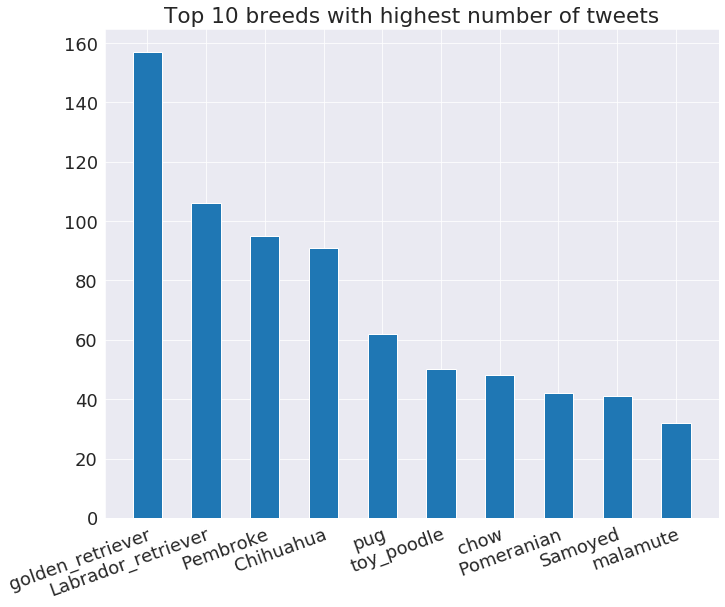

In [71]:
df_master = pd.read_csv("twitter_archive_master.csv")
df_master.timestamp = pd.to_datetime(df_master.timestamp, format='%Y-%m-%d %H:%M:%S')

def plot_barchart(data_, names_, title, save_to, rotation=20):
    """
    Plot a bar chart with column names and saves it as png.
    """
    width=0.5
    fig = plt.figure(figsize=(11, 9))
    axis = plt.subplot(111)
    bins = np.arange(1, len(data_) + 1)

    axis.bar(bins, data_, width=width)
    axis.set_xticks(bins)
    axis.set_xticklabels(names_,rotation=rotation, rotation_mode="anchor", ha="right")
    axis.set_title(title)

    fig.savefig(save_to)
    

top_n = 10
data = df_master.breed.value_counts()[:top_n]
names = df_master.breed.value_counts().index[:top_n]

plot_barchart(data, names, f"Top {top_n} breeds with highest number of tweets", f'images/Top_{top_n}_tweets.png')

**Insight #1 the most tweeted breed is golden retriever!**

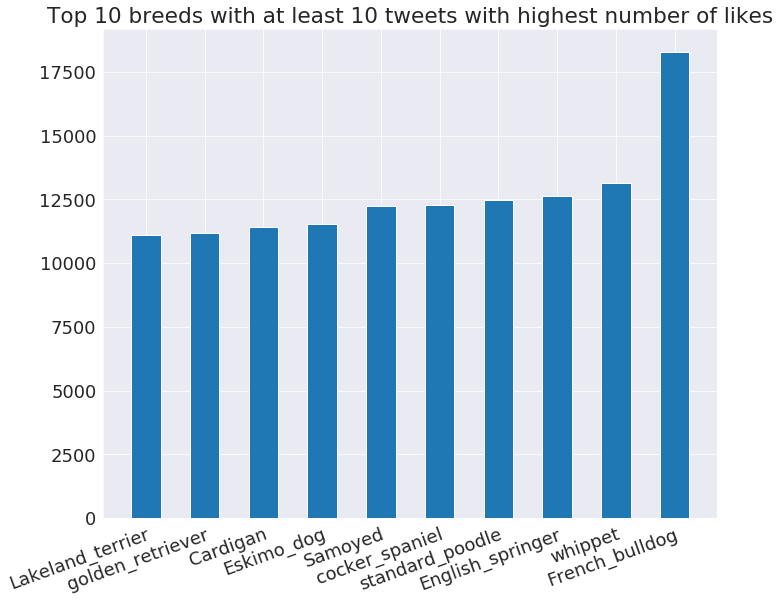

In [72]:
top_n = 10
min_tweets = 10

# placeholders
length = len(df_master.breed.unique())
mean_likes = np.zeros(length)
n_tweets = np.zeros(length)
names = df_master.breed.unique()

# fill placeholders
for i, breed in enumerate(names):
    data = df_master.query(f"breed == '{breed}'")
    mean_likes[i] = data.favorite_count.mean()
    n_tweets[i] = len(data)

# filter for breeds with at least 10 tweets
# this is to avoid to include breeds with a couple of tweets and lots of likes
# since they might be an exception
idx = n_tweets >= min_tweets
mean_likes = mean_likes[idx]
names = names[idx]

mean_likes, names = zip(*sorted(zip(mean_likes, names)))
mean_likes, names = mean_likes[-top_n:], names[-top_n:]

plot_barchart(mean_likes, names, f"Top {top_n} breeds with at least {min_tweets} tweets with highest number of likes", 'images/Top_10_likes.png')

**Insight #2 The most liked breed is french bulldog**

It appears that golden retriever and samoyed are both the most popular and the ones with more likes!

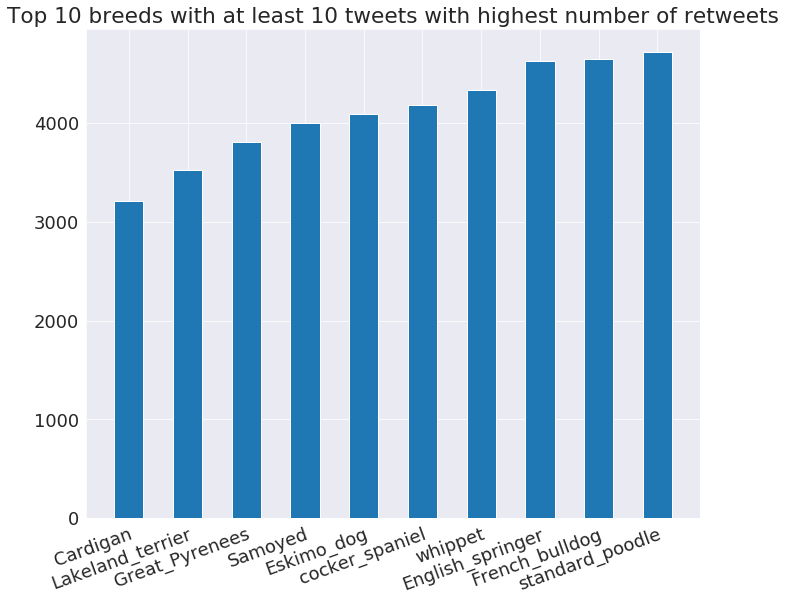

In [73]:
top_n = 10
min_tweets = 10

# placeholders
length = len(df_master.breed.unique())
mean_retweets = np.zeros(length)
n_tweets = np.zeros(length)
names = df_master.breed.unique()

# fill placeholders
for i, breed in enumerate(names):
    data = df_master.query(f"breed == '{breed}'")
    mean_retweets[i] = data.retweet_count.mean()
    n_tweets[i] = len(data)

# filter for breeds with at least 10 tweets
# this is to avoid to include breeds with a couple of tweets and lots of likes
# since they might be an exception
idx = n_tweets >= min_tweets
mean_retweets = mean_retweets[idx]
names = names[idx]

mean_retweets, names = zip(*sorted(zip(mean_retweets, names)))
mean_retweets, names = mean_retweets[-top_n:], names[-top_n:]

plot_barchart(mean_retweets, names, f"Top {top_n} breeds with at least {min_tweets} tweets with highest number of retweets", f'images/Top_{top_n}_retweets.png')

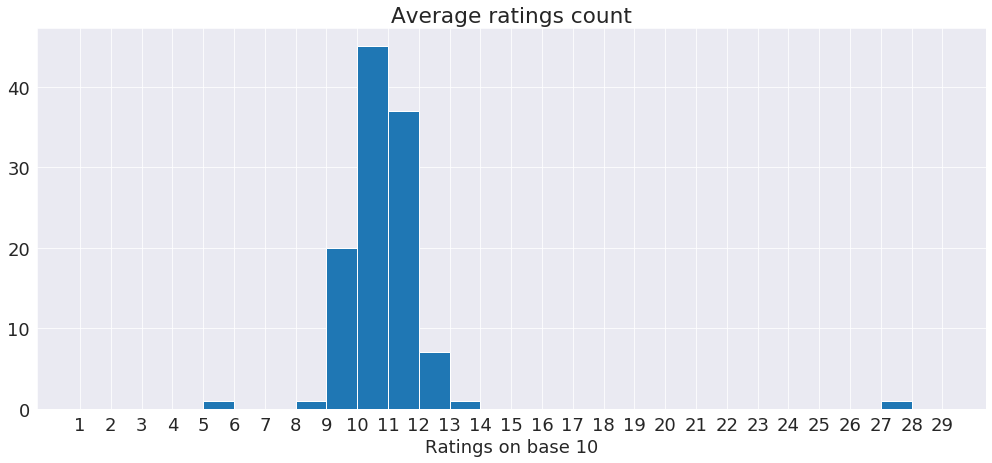

In [85]:
avg_ratings = [df_master.query(f"breed == '{breed}'").rating_numerator.mean() for breed in df_master.breed.dropna().unique()]
breeds = df_master.breed.dropna().unique()
avg_ratings, breeds = zip(*sorted(zip(avg_ratings, breeds)))

plt.figure(figsize=(17, 7))
ax = plt.subplot(111)
ax.hist(avg_ratings, bins=np.arange(1, 30))
ax.set_xticks(np.arange(1, 30))
ax.set_title("Average ratings count")
ax.set_xlabel("Ratings on base 10")
plt.show()

In [75]:
worse = len(df_master.query(f"breed == '{breeds[0]}'"))
best = len(df_master.query(f"breed == '{breeds[-1]}'"))

print(f"Worse rated breed with an average score of {avg_ratings[0]}/10 and {worse} total tweets is a {breeds[0]}")
print(f"Best rated breed with an average score of {avg_ratings[-1]}/10 and {best} total tweets is a {breeds[-1]}")

Worse rated breed with an average score of 5.0/10 and 1 total tweets is a Japanese_spaniel
Best rated breed with an average score of 27.0/10 and 1 total tweets is a clumber


**Insight #3**
It seems that most of the breeds get an average rating between 9/10 and 11/10, but there is 1 tweet of a Japanese spaniel performing bad and another tweet of a Clumber performing extremely well.

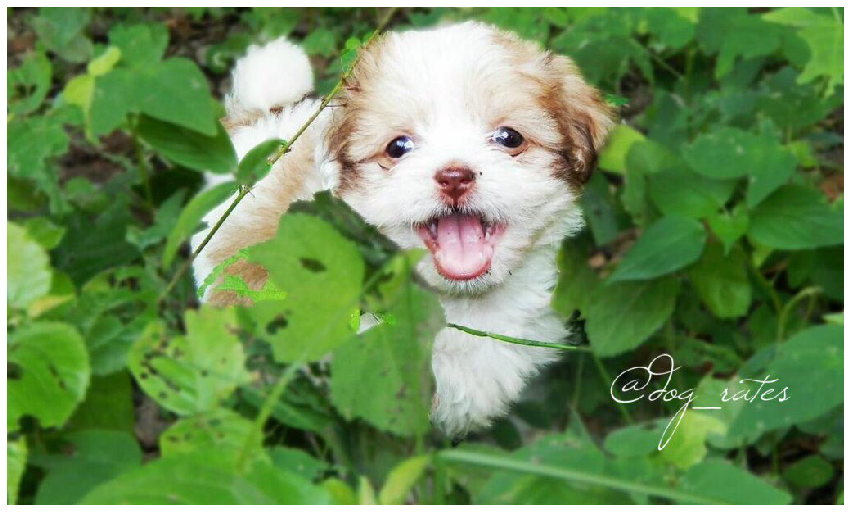

In [76]:
r = requests.get(df_master.query(f"breed == 'clumber'").jpg_url[547])
image = Image.open(BytesIO(r.content))
plt.figure(figsize=(15, 13))
plt.imshow(image)
plt.axis("off")
plt.title = "Best rated dog!"
plt.show()